We are going to use the USA_Housing dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city hou se is located in
'Price': Price that the house sold at
'Address': Address for the house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sns.set_style("whitegrid")全部的import需要写在这个cell中
plt.style.use("fivethirtyeight")

In [3]:
USAhousing = pd.read_csv('../others/USA_Housing.csv')#USAhousing已经是一个pandas对象了
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [48]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [50]:
def address2city(address):
    temp = address.split('\n')[1] #地址是以\n来进行分割的，所以[1]部分是我们所需要的
    if ',' in temp: #其中一部分的地址是以‘,’来进行分割的
        city = temp.split(',')[0]
    else:
        city=temp.split(' ')[0]
    return city

USAhousing.loc[:,'city'] = USAhousing['Address'].apply(address2city)

In [51]:
def address2district(address):
    temp = address.split('\n')[1] #地址是以\n来进行分割的，所以[1]部分是我们所需要的
    if ',' in temp: #其中一部分的地址是以‘,’来进行分割的
        district = temp.split(',')[1].split()[0]
    else:
        district=temp.split(' ')[1]
    return district

USAhousing.loc[:,'district'] = USAhousing['Address'].apply(address2district)

In [52]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,city,district
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",Laurabury,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",Lake Kathleen,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",Danieltown,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,FPO,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,FPO,AE


#### 思考一个问题？
city和district是否会对Price产生影响？

In [53]:
USAhousing.describe(include = ['O'])
#通过分析，我们可以得出如下结论
#1） address这个变量是需要被放弃的，原因是没有重复的数据
#2）city这个变量重复的其实也很少，所以考虑丢弃
#3）重点思考district是否需要保留？

,Address,city,district
count,5000,5000,5000
unique,5000,3909,62
top,"30340 Traci Streets\nWardview, AK 82480-1685",FPO,AA
freq,1,185,177


In [44]:
USAhousing[['district','Price']].groupby(USAhousing['district']).mean()

,Price
district,
AA,1.262606e+06
AE,1.257148e+06
AK,1.337328e+06
AL,1.211095e+06
AP,1.231381e+06
...,...
VT,1.189664e+06
WA,1.236601e+06
WI,1.257002e+06


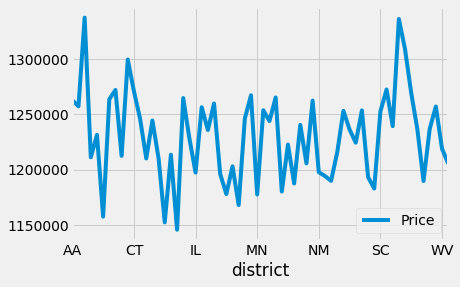

In [54]:
USAhousing[['district','Price']].groupby(USAhousing['district']).mean().plot()

In [14]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population','district']]
y = USAhousing['Price']

In [ ]:
#先是将district做一次转换 使用one_hot encoding,但是也可以使用labelencoding

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#作用：去均值和方差归一化
X_train = scaler.fit_transform(X_train)#计算训练集的均值和方差，并对训练集做归一化
X_test = scaler.transform(X_test) #用训练集的均值和方差来对测试集做归一化

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
# print the intercept
print(lin_reg.intercept_) #截距

1228219.1492415662


In [23]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient',ascending=False)

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Area Population,151252.342377
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119


In [25]:
test_pred = lin_reg.predict(X_test)

Test set evaluation:
_____________________________________
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


In [26]:
pred = lin_reg.predict(X_test)

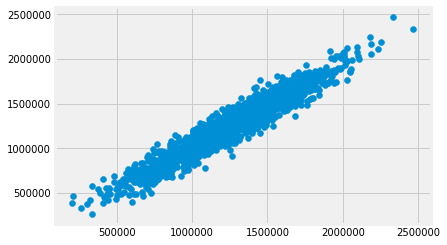

In [27]:
plt.scatter(y_test, pred)

In [30]:
import pickle
scalerfile = './scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
pickle.dump(lin_reg, open('./housingmodel.pkl','wb'))

作业：
1. 增加address作为特征之一，考虑如何处理
2. 目前算法使用的是普通线性回归，可以使用岭回归，lasso回归以及弹性网络，来看看是否会减少误差，r2square更高。
3. 尝试将岭回归，lasso回归，弹性网络做gridsearchcv 找到最佳参数以及最佳score
4. 完成整个数据报告，并且提交